In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.color import rgb2gray

In [2]:
img1 = imread('_data/smile/smile/James_Jones_0001.jpg')
img2 = imread('_data/smile/smile/Jeffery_Hendren_0001.jpg')

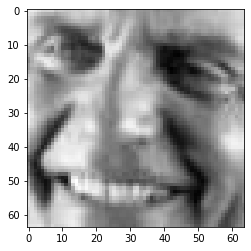

In [3]:
plt.imshow(rgb2gray(img1), cmap='gray');

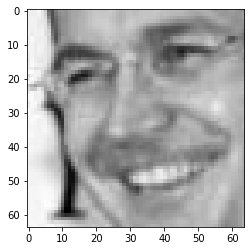

In [4]:
plt.imshow(rgb2gray(img2), cmap='gray');

In [5]:
sm_path = '_data/smile/smile/'
ns_path = '_data/smile/non_smile/'
sm_file_list = os.listdir(sm_path)
ns_file_list = os.listdir(ns_path)

print('There are {} smile data and {} non smile data!'.format(len(sm_file_list), len(ns_file_list)))

There are 600 smile data and 603 non smile data!


In [6]:
X_smile = np.empty((len(sm_file_list), 64*64))

indx = 0
for f in sm_file_list:
    img = imread(os.path.join(sm_path, f))
    X_smile[indx, :] = rgb2gray(img).flatten()
    indx += 1
    
y_smile = ['smile']*len(sm_file_list)
    
    
X_non_smile = np.empty((len(ns_file_list), 64*64))

indx = 0
for f in ns_file_list:
    img = imread(os.path.join(ns_path, f))
    X_non_smile[indx, :] = rgb2gray(img).flatten()
    indx += 1
    
y_non_smile = ['non_smile']*len(ns_file_list)

X = np.concatenate([X_smile, X_non_smile])
y = np.asarray(y_smile + y_non_smile)

In [7]:
X.shape, y.shape

((1203, 4096), (1203,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 4096), (181, 4096), (1022,), (181,))

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [12]:
steps1 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', ABC(n_estimators=30))]

steps2 = [('dimension reduction', PCA(n_components=0.9)),
          ('classifier', RFC(n_estimators=30))]

clf1 = Pipeline(steps=steps1)
clf2 = Pipeline(steps=steps2)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

Pipeline(steps=[('dimension reduction', PCA(n_components=0.9)),
                ('classifier', RandomForestClassifier(n_estimators=30))])

In [13]:
print(accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))

0.8784530386740331


In [14]:
print(accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

0.856353591160221
